**DAY-6 16/01/2024**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math,random
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
churn_data=pd.read_csv("/content/drive/MyDrive/customer_churn (1).csv")

In [ ]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_data.shape

(7043, 21)

In [ ]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn_data.drop("customerID",axis=1,inplace=True)

In [ ]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn_data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
churn_data[churn_data["TotalCharges"]==" "].shape

(11, 20)

In [ ]:
churn_data1=churn_data[churn_data["TotalCharges"]!=" "]

In [ ]:
churn_data.shape, churn_data1.shape

((7043, 20), (7032, 20))

In [ ]:
churn_data["TotalCharges"],churn_data1.TotalCharges

(0         29.85
 1        1889.5
 2        108.15
 3       1840.75
 4        151.65
          ...   
 7038     1990.5
 7039     7362.9
 7040     346.45
 7041      306.6
 7042     6844.5
 Name: TotalCharges, Length: 7043, dtype: object,
 0         29.85
 1        1889.5
 2        108.15
 3       1840.75
 4        151.65
          ...   
 7038     1990.5
 7039     7362.9
 7040     346.45
 7041      306.6
 7042     6844.5
 Name: TotalCharges, Length: 7032, dtype: object)

In [ ]:
type(churn_data["TotalCharges"]),type(churn_data.TotalCharges)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
churn_data1.TotalCharges=pd.to_numeric(churn_data1.TotalCharges)

<ipython-input-15-c7959c594abc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1.TotalCharges=pd.to_numeric(churn_data1.TotalCharges)


In [ ]:
churn_data1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
churn_data1.Churn.values

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [ ]:
churn_data1[churn_data1.Churn=="Yes"].shape

(1869, 20)

In [ ]:
churn_data1[churn_data1.Churn=="No"].shape

(5163, 20)

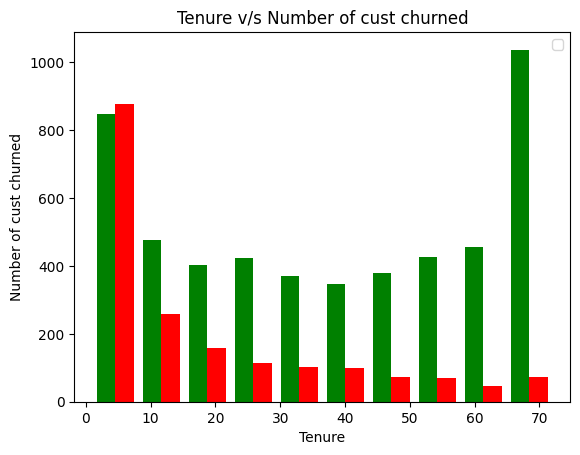

In [ ]:

tenure_churn_no=churn_data1[churn_data1.Churn=='No'].tenure
tenure_churn_yes=churn_data1[churn_data1.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of cust churned")
plt.title("Tenure v/s Number of cust churned")


plt.hist([tenure_churn_no,tenure_churn_yes],color=["green","red"])
plt.legend()

([<matplotlib.patches.Wedge at 0x78fa32db5240>,
 [Text(-0.7383051242403968, 0.8154174044747711, 'tenure_churn_no'),
  Text(0.7383051242403964, -0.8154174044747714, 'tenure_churn_yes')])

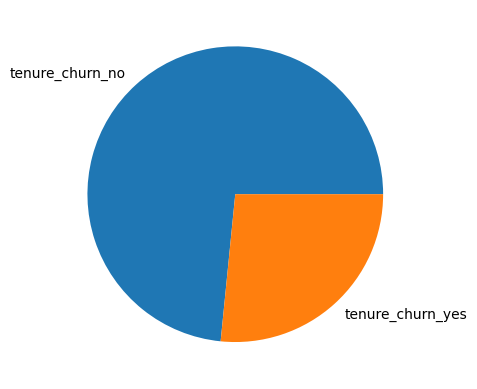

In [ ]:
x = tenure_churn_no.count()
y = tenure_churn_yes.count()
a = np.array([x,y])
mylabels = ['tenure_churn_no','tenure_churn_yes']

plt.pie(a, labels = mylabels)

**Encoding**

In [ ]:
churn_data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:

def col__unique__values(d):
  for col in d:
    print(col,":",d[col].unique())

In [ ]:
col__unique__values(churn_data1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [ ]:
churn_data1.replace("No phone service","No",inplace=True)
churn_data1.replace("No internet service","No",inplace=True)

<ipython-input-29-9c0595387615>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1.replace("No phone service","No",inplace=True)
<ipython-input-29-9c0595387615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1.replace("No internet service","No",inplace=True)


In [ ]:
yes_no_col=["SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for i in yes_no_col:
  churn_data1[i].replace({"Yes":1,"No":0},inplace=True)

<ipython-input-30-5a6de99103d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1[i].replace({"Yes":1,"No":0},inplace=True)


In [ ]:
col__unique__values(churn_data1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
churn_data_pro=pd.get_dummies(data=churn_data1,columns=["InternetService","Contract","PaymentMethod"])

In [ ]:
churn_data_pro

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,Male,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,Male,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,Male,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,Female,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,Female,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,Female,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,Male,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
col_to_scale=["tenure","MonthlyCharges","TotalCharges"]
scaler=MinMaxScaler()
churn_data_pro[col_to_scale]=scaler.fit_transform(churn_data_pro[col_to_scale])

In [ ]:
churn_data_pro.replace({'Male':1,'Female':0,'No':0},inplace=True)

In [ ]:
X=churn_data_pro.drop("Churn",axis="columns")
y=churn_data_pro["Churn"]

In [ ]:
X=pd.get_dummies(X)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [ ]:
model=keras.Sequential([keras.layers.Dense(1,input_shape=(26,),activation="relu")])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train,y_train, epochs=10, batch_size=500)

Epoch 1/10
12/12 [==============================] - 2s 7ms/step - loss: 4.0844 - accuracy: 0.7344
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 4.0822 - accuracy: 0.7344
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 4.0818 - accuracy: 0.7344
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 4.0817 - accuracy: 0.7344
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 4.0816 - accuracy: 0.7344
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 4.0816 - accuracy: 0.7342
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 4.0815 - accuracy: 0.7342
Epoch 8/10
12/12 [==============================] - 0s 5ms/step - loss: 4.0814 - accuracy: 0.7342
Epoch 9/10
12/12 [==============================] - 0s 7ms/step - loss: 4.0814 - accuracy: 0.7344
Epoch 10/10
12/12 [==============================] - 0s 4ms/step - loss: 4.0814 - accuracy: 0.7344


In [ ]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 4.1055 - accuracy: 0.7328


[4.1054816246032715, 0.732764720916748]

In [ ]:
y_test_pre=model.predict(X_test)
y_test_pre.shape

44/44 [==============================] - 0s 1ms/step


(1407, 1)

In [ ]:
y_test=np.array(y_test)

In [ ]:
y_test[6]

0

In [ ]:
y_test_pre[66]

array([0.], dtype=float32)

In [ ]:
y_predicted = []
for i in y_test_pre:
  if i <0.5:
    y_predicted.append(0)
  else:
    y_predicted.append(1)
y_predicted[77]

0

In [ ]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[1031,    0],
       [ 376,    0]])

In [ ]:
y_predicted[200],y_test[200]

(0, 1)

In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1031
           1       0.00      0.00      0.00       376

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
con_mat=tf.math.confusion_matrix(y_test,y_predicted)

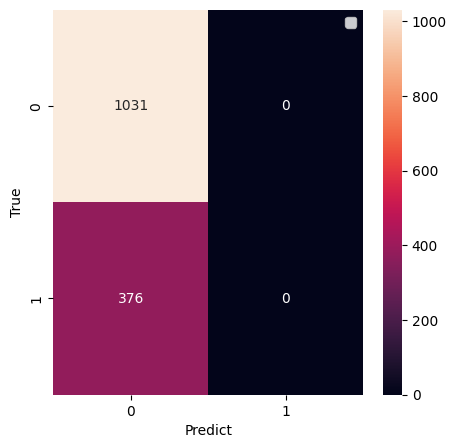

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel('Predict')
plt.ylabel('True')
plt.legend()

**initializers**

In [ ]:
#model1

model1 = keras.Sequential([keras.layers.Flatten(),
    keras.layers.Dense(64, input_shape = (26,), activation = "sigmoid",kernel_initializer = keras.initializers.GlorotNormal()),
                            keras.layers.Dense(128, activation = "sigmoid"),
                            keras.layers.Dense(128, activation = "sigmoid"),
                            keras.layers.Dense(64, activation = 'sigmoid'),
                            keras.layers.Dense(32, activation = "sigmoid"),
                            keras.layers.Dense(2, activation = "sigmoid")])

model1.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model1.fit(X_train, y_train, epochs = 200)

Epoch 1/200
176/176 [==============================] - 4s 8ms/step - loss: 0.5789 - accuracy: 0.7314
Epoch 2/200
176/176 [==============================] - 3s 17ms/step - loss: 0.4512 - accuracy: 0.7785
Epoch 3/200
176/176 [==============================] - 1s 4ms/step - loss: 0.4368 - accuracy: 0.7908
Epoch 4/200
176/176 [==============================] - 1s 4ms/step - loss: 0.4295 - accuracy: 0.7964
Epoch 5/200
176/176 [==============================] - 1s 4ms/step - loss: 0.4302 - accuracy: 0.7966
Epoch 6/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.7950
Epoch 7/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.7972
Epoch 8/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7998
Epoch 9/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8014
Epoch 10/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4223 - accur

In [ ]:
#model2
# prompt: add dropout layers in model2

model2 = keras.Sequential([keras.layers.Flatten(),
    keras.layers.Dense(64, input_shape = (26,), activation = "sigmoid",kernel_initializer = keras.initializers.GlorotNormal()),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(128, activation = "sigmoid"),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(128, activation = "sigmoid"),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(64, activation = 'sigmoid'),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(32, activation = "sigmoid"),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(2, activation = "sigmoid")])

model2.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 3s 4ms/step - loss: 0.6110 - accuracy: 0.7157
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5634 - accuracy: 0.7388
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4572 - accuracy: 0.7808
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4511 - accuracy: 0.7794
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4454 - accuracy: 0.7893
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4437 - accuracy: 0.7961
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.7975
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.7918
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.7957
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4353 - accura

In [ ]:
#model3
# prompt: add batch normalization in model2

model3 = keras.Sequential([keras.layers.Flatten(),
    keras.layers.Dense(64, input_shape = (26,), activation = "sigmoid",kernel_initializer = keras.initializers.GlorotNormal()),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(128, activation = "sigmoid"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(128, activation = "sigmoid"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(64, activation = 'sigmoid'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(32, activation = "sigmoid"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(2, activation = "sigmoid")])

model3.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model3.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 10s 5ms/step - loss: 0.6037 - accuracy: 0.6919
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4887 - accuracy: 0.7580
Epoch 3/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4675 - accuracy: 0.7668
Epoch 4/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4529 - accuracy: 0.7758
Epoch 5/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4537 - accuracy: 0.7813
Epoch 6/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4436 - accuracy: 0.7915
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4395 - accuracy: 0.7888
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4354 - accuracy: 0.7929
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4393 - accuracy: 0.7883
Epoch 10/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4402 - accur

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 26)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                1728      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                     

In [ ]:
#model4
model4 = keras.Sequential([

    keras.layers.Dense(1, input_shape=(26,), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal())])

    #keras.layers.Dense(1, input_shape=(27,), activation='relu',kernal.initializer=tf.keras.initializers.GlorotNormal())])


model4.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Accuracy']
)

# Fit the model
model4.fit(X_train,y_train, epochs=100,batch_size=500)

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 3.9655 - Accuracy: 0.7159
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 3.9590 - Accuracy: 0.7148
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 3.9528 - Accuracy: 0.7156
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 3.9412 - Accuracy: 0.7179
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 3.9367 - Accuracy: 0.7214
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 3.9347 - Accuracy: 0.7228
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 3.9247 - Accuracy: 0.7234
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 3.9226 - Accuracy: 0.7234
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 3.9187 - Accuracy: 0.7230
Epoch 10/100
12/12 [==============================] - 0s 5ms/step - loss: 3.9100 - Accuracy: 0.7230
Epoch 11/

**Dropout**

In [ ]:
model_d=keras.Sequential([keras.layers.Dense(100,input_shape=(26,),activation="relu"),
                        keras.layers.Dropout(0.2),
                        keras.layers.Dense(1,activation="sigmoid"),
                        ])

model_d.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_d.fit(X_train,y_train, epochs=100  )

Epoch 1/100
176/176 [==============================] - 2s 5ms/step - loss: 0.4727 - accuracy: 0.7682
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4260 - accuracy: 0.8005
Epoch 3/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4229 - accuracy: 0.8037
Epoch 4/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4176 - accuracy: 0.8041
Epoch 5/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4191 - accuracy: 0.7989
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4156 - accuracy: 0.8052
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4134 - accuracy: 0.8075
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8060
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4110 - accura

In [ ]:
model_d.evaluate(X_test,y_test)

44/44 [==============================] - 1s 7ms/step - loss: 0.4438 - accuracy: 0.7896


[0.44376063346862793, 0.7896233201026917]

**Bacth Normalization**

In [ ]:
model_non=keras.Sequential([keras.layers.Dense(100,input_shape=(26,)),
                            keras.layers.BatchNormalization(),
                            keras.layers.Activation("relu"),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(1,activation="sigmoid"),
                            ])

model_non.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_non.fit(X_train,y_train, epochs=100  )

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.4643 - accuracy: 0.7740
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4354 - accuracy: 0.7940
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.7954
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.7961
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4217 - accuracy: 0.7991
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4192 - accuracy: 0.8005
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4149 - accuracy: 0.8034
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.8069
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4159 - accuracy: 0.8030
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4100 - accura

In [ ]:
model_non.evaluate(X_test,y_test)

44/44 [==============================] - 0s 4ms/step - loss: 0.4376 - accuracy: 0.7946


[0.437617689371109, 0.7945984601974487]

In [ ]:
model_nor=keras.Sequential([keras.layers.Dense(100,input_shape=(26,)),
                            keras.layers.BatchNormalization(),
                            keras.layers.Activation("relu"),
                            keras.layers.Dropout(0.2),

                            keras.layers.Dense(100),
                            keras.layers.BatchNormalization(),
                            keras.layers.Activation("relu"),
                            keras.layers.Dropout(0.2),


                            keras.layers.Dense(1,activation="sigmoid"),
                            ])

model_nor.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_nor.fit(X_train,y_train, epochs=100  )

Epoch 1/100
176/176 [==============================] - 8s 11ms/step - loss: 0.4703 - accuracy: 0.7712
Epoch 2/100
176/176 [==============================] - 3s 17ms/step - loss: 0.4335 - accuracy: 0.7972
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4292 - accuracy: 0.7925
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.7945
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4278 - accuracy: 0.7963
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4212 - accuracy: 0.8018
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4215 - accuracy: 0.8002
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4210 - accuracy: 0.8002
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4204 - accuracy: 0.8007
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4195 - accu